## <strong>PROJETO FINAL VISÃO COMPUTACIONAL</strong>
**EXOPLANETAS**

Nicole Sarvasi Alves da Costa

Marcelo Miguel

Nosso projeto foi baseado no uso do Lightkurve, um pacote com o objetivo de apoiar a ciência em conjunto com os dados provindos dos telescópios espaciais TESS e o Kepler da NASA. Em suma, o objetivo deles é criar um ambiente fácil, acessível e open source para a análise de dados de séries temporais sobre o brilho de planetas, estrelas e galáxias.

Nesta aplicação em específico, implementamos um algoritmo de processamento com a função de filtro passa-baixa, depois fazemos a detecção do contorno para o cálculo da área da estrela e por fim plotamos um gráfico 3D da imagem pela sua intensidade.



**PASSO 1:** instalar o lightkurve e importar o search_targetpixelfile

In [1]:
#! python -m pip install lightkurve --upgrade

In [2]:
from lightkurve import search_targetpixelfile
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2
from astropy.convolution import convolve
from astropy.convolution.kernels import Gaussian1DKernel
from astropy import units as u
import imageio
import os
import lightkurve as lk
from astropy.convolution.kernels import Gaussian2DKernel

**PASSO 2:** baixar a imagem e plotar

In [3]:
search_result = lk.search_targetpixelfile("Kepler-8", author="Kepler",cadence="long")
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 00,2009,Kepler,1800,kplr006922244,0.0
1,Kepler Quarter 01,2009,Kepler,1800,kplr006922244,0.0
2,Kepler Quarter 02,2009,Kepler,1800,kplr006922244,0.0
3,Kepler Quarter 03,2009,Kepler,1800,kplr006922244,0.0
4,Kepler Quarter 04,2010,Kepler,1800,kplr006922244,0.0
5,Kepler Quarter 05,2010,Kepler,1800,kplr006922244,0.0
6,Kepler Quarter 06,2010,Kepler,1800,kplr006922244,0.0
7,Kepler Quarter 07,2010,Kepler,1800,kplr006922244,0.0
8,Kepler Quarter 08,2011,Kepler,1800,kplr006922244,0.0


In [4]:
list_stars = ['KIC 8462852','KIC 8121913', 'KIC 10068024','KIC 5479689', 'KIC 7821010']

In [5]:
list_pixels_stars= []
for star in list_stars:
    list_pixels_stars.append(search_targetpixelfile(star, quarter=16).download())
    

/home/marcelo/.local/lib/python3.8/site-packages/lightkurve/search.py:346: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


In [6]:
list_pixels_stars

[KeplerTargetPixelFile Object (ID: 8462852),
 KeplerTargetPixelFile Object (ID: 8121913),
 KeplerTargetPixelFile Object (ID: 10068024),
 KeplerTargetPixelFile Object (ID: 5479689),
 KeplerTargetPixelFile Object (ID: 7821010)]

**PASSO 2:** baixar a imagem e plotar seu heatmap


In [7]:
list_pixels_stars[0].animate()

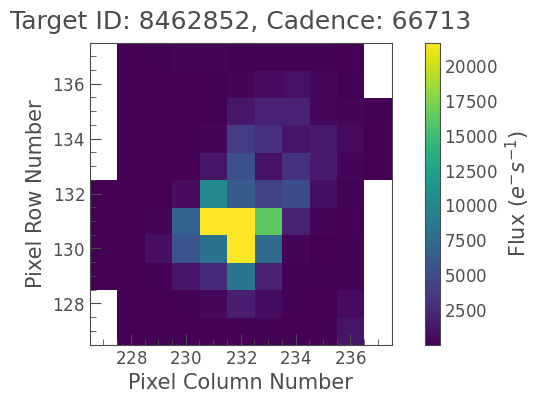

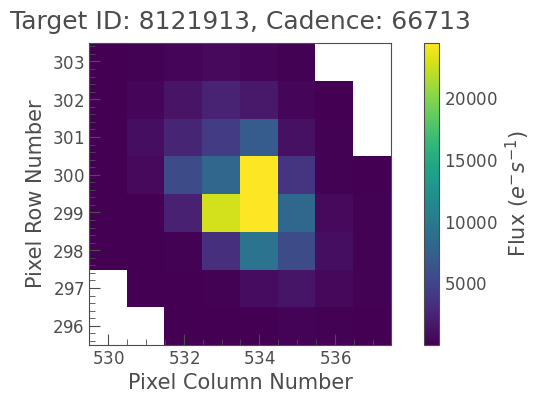

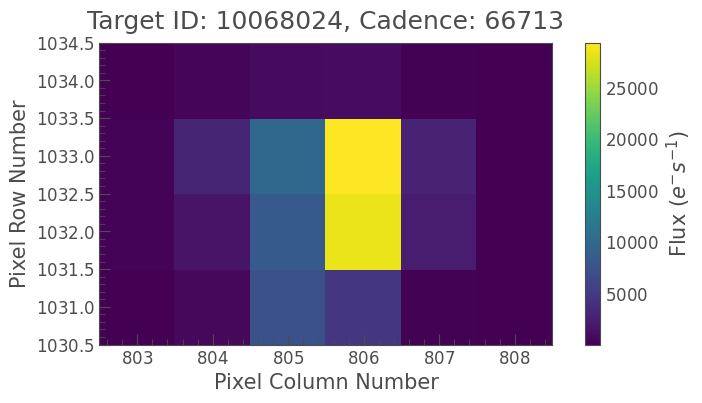

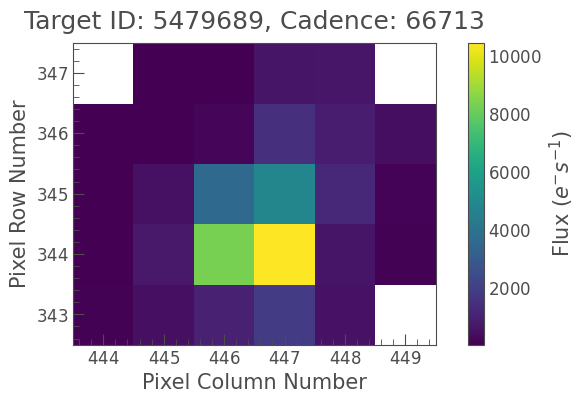

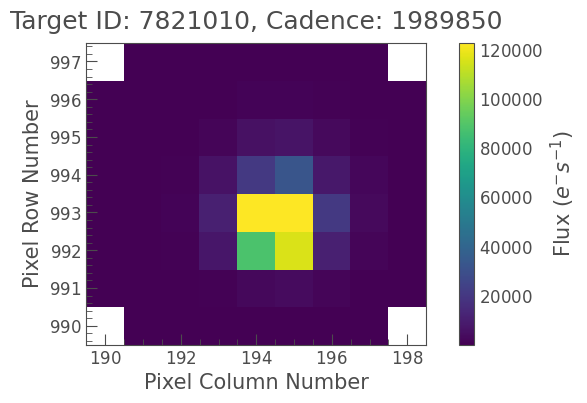

In [8]:
for i in range(len(list_pixels_stars)):
    list_pixels_stars[i].plot()

**PASSO 3:** Cálcular da área

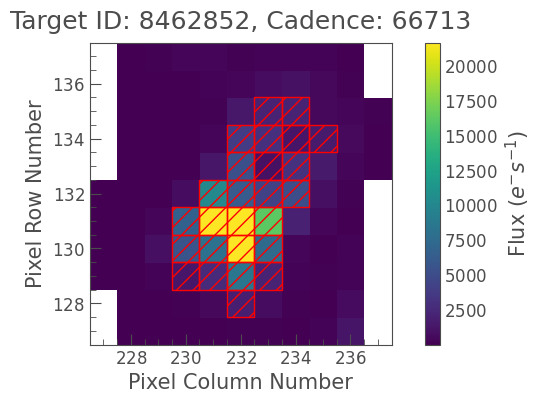

In [9]:
list_pixels_stars[0].plot(aperture_mask=list_pixels_stars[0].pipeline_mask);


A estrela ocupa uma área de 26 pixels²


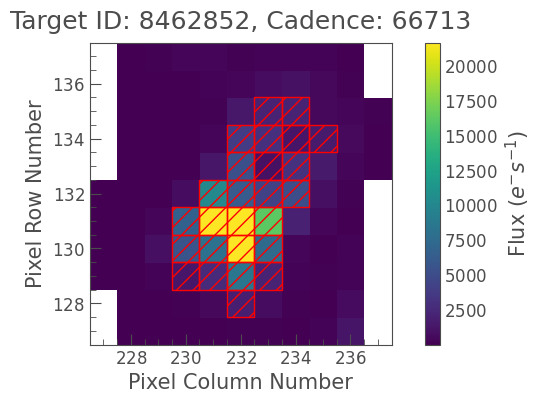

A estrela ocupa uma área de 18 pixels²


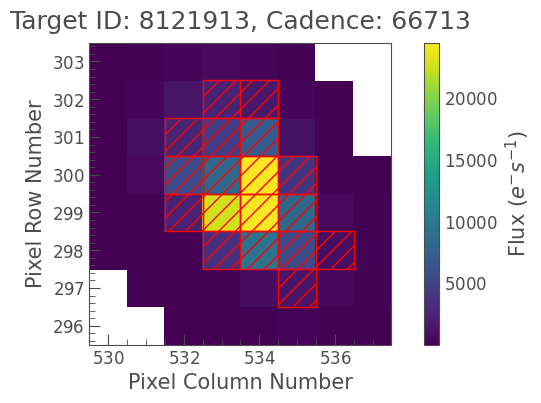

A estrela ocupa uma área de 6 pixels²


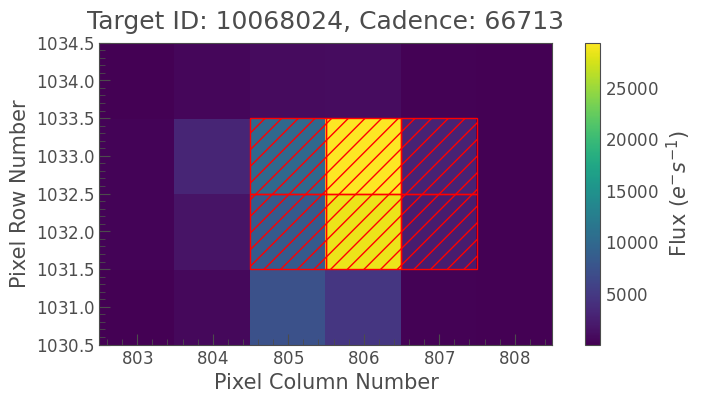

A estrela ocupa uma área de 9 pixels²


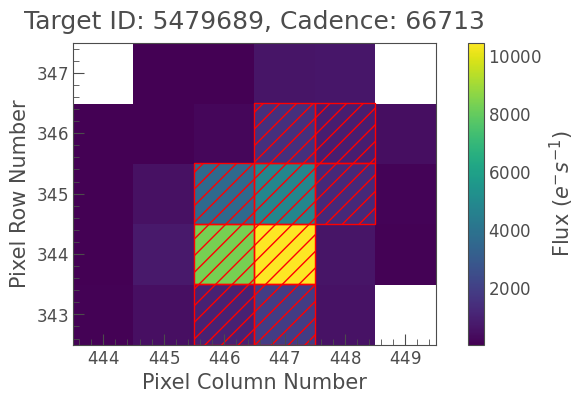

A estrela ocupa uma área de 24 pixels²


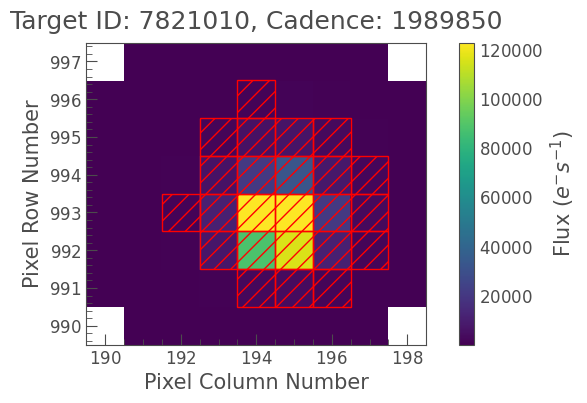

In [10]:
for star_pixel in list_pixels_stars:
    aperture_mask=star_pixel.pipeline_mask
    print(f"A estrela ocupa uma área de {aperture_mask.sum()} pixels²")
    star_pixel.plot(aperture_mask=aperture_mask)
    plt.show()
    
    #     print(aperture_mask.sum())

In [11]:
def plot_heatmap(matrix):    
    sns.heatmap(matrix)
    plt.gca().invert_yaxis()
    plt.show()


In [12]:
list_pixels_stars[0]

KeplerTargetPixelFile Object (ID: 8462852)

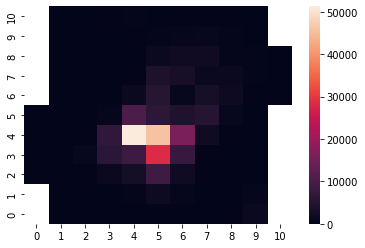

<AxesSubplot:title={'center':'Target ID: 8462852, Cadence: 66713'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

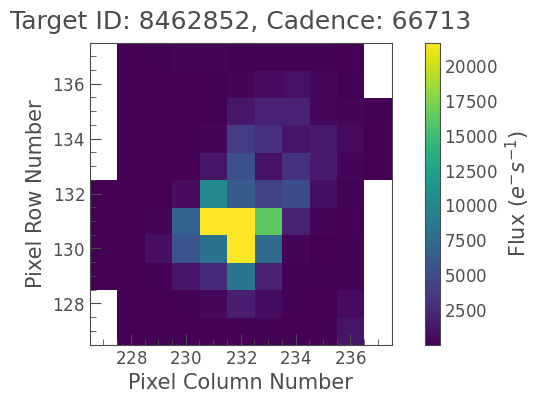

In [13]:
plot_heatmap(list_pixels_stars[0].flux[0])
list_pixels_stars[0].plot()

**PASSO 4:** Aplicar um filtro passa-baixa no heatmap

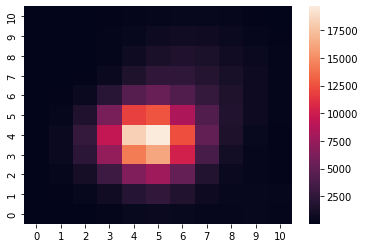

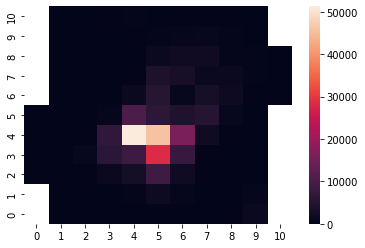

In [14]:
example_blur = convolve(list_pixels_stars[0].flux[0], Gaussian2DKernel(1))
plot_heatmap(example_blur)
plot_heatmap(list_pixels_stars[0].flux[0])

In [15]:
list_star_blur = []
for star in list_pixels_stars:
    blur = convolve(star.flux[0], Gaussian2DKernel(1))
    list_star_blur.append(blur)

**PASSO 5:** Transferir o eixo de intensidade para uma escala de 1 a 256

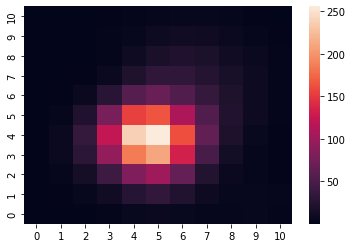

In [16]:
max_value =max(map(max, example_blur))
blur_normalize_example = example_blur*256/max_value
plot_heatmap(blur_normalize_example)

In [17]:
list_star_normalize = []
for i in range(len(list_star_blur)):
    max_value =max(map(max, list_star_blur[i]))
    blur_normalize = list_star_blur[i]*256/max_value
    list_star_normalize.append(blur_normalize)

**PASSO 6:** Detectar contorno

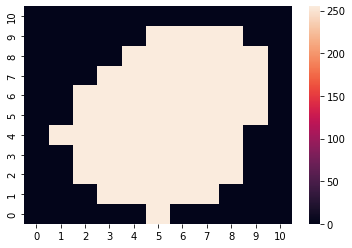

In [18]:
def bin_image(image):    
    rows,cols=image.shape
    T=np.median(image)
    image_ = image.copy()
    for l in range(rows):
        for c in range(cols):
            if image[l,c] < T:
                image_[l,c]=0
            else:
                image_[l,c]=255
    return image_
example_bin = bin_image(list_star_normalize[0])
plot_heatmap(example_bin)

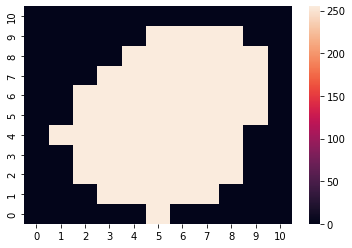

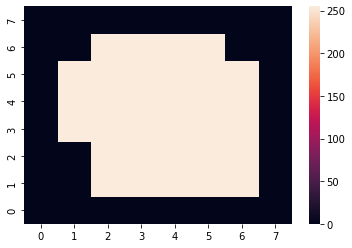

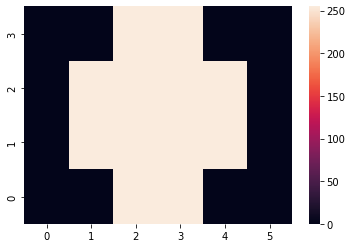

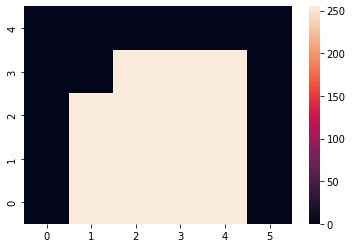

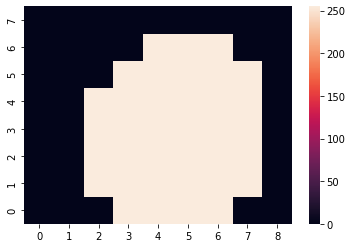

In [19]:
for i in range(len(list_star_normalize)):
    star_normalize = bin_image(list_star_normalize[i])
    plot_heatmap(star_normalize)
    list_star_normalize[i] = star_normalize

**PASSO 7:** Construção 3d da estrela

In [20]:
def get_parameters(matrix):
    one_electron = 1*u.electron/u.s
    x, y = matrix.nonzero()
    rows,cols=matrix.shape
    z = []
    for l in range(rows):
        for c in range(cols):
            z.append(matrix[l,c]/one_electron)
    return x,y,z

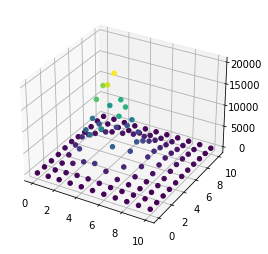

In [24]:
x,y,z = get_parameters(list_star_blur[0])
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=z, alpha=1)

In [ ]:
one_electron = 1*u.electron/u.s
# from astropy.visualization import quantity_support
# quantity_support()  
a = 0
for star in list_pixels_stars:
    
    filenames = []
    for i in range(0,len(star.flux),50):
        matrix_i = star.flux[i]
        matrix_i = convolve(matrix_i, Gaussian2DKernel(2))
        rows,cols=matrix_i.shape
        z = []
        maior = 0
        for l in range(rows):
            for c in range(cols):
                if maior < matrix_i[l,c]/one_electron:
                    maior = matrix_i[l,c]/one_electron
    for i in range(0,len(star.flux),50):
        
        filename = f'{i}.png'
        filenames.append(filename)
        matrix_i = star.flux[i]
        matrix_i = convolve(matrix_i, Gaussian2DKernel(2))
        x,y,z = get_parameters(matrix_i)
        plt.rcParams["figure.figsize"] = [7.00, 3.50]
        plt.rcParams["figure.autolayout"] = True
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.set_zlim(0, int(maior*1.2))
        ax.scatter(x, y, z, c=z, alpha=1)
        plt.savefig(filename)
        plt.close()
        # build gif
    with imageio.get_writer(f'gif{a}.gif', mode='I') as writer:
        for filename in filenames:
            image = imageio.imread(filename)
            writer.append_data(image)
    a+=1   
    # Remove files
    for filename in set(filenames):
        os.remove(filename)


# Referências

-  https://docs.lightkurve.org/
-  http://exoplanet.eu/catalog/